## **Taxi Fare Forecasting:
 Uncovering Hidden Patterns in Ride Pricing**

## **1. Introduction :**

Accurate taxi fare prediction is essential for both passengers and service providers. This project uses data science to build a smart model that analyzes trip characteristics—like Trip distance, Time of the day , Weather etc—to forecast fares and uncover pricing patterns.

## **2. Dataset :**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
df = pd.read_csv('C:\\Users\\Tanvir\\Downloads\\archive\\taxi_trip_pricing.csv')

df.head() 

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


## 2.1. Description of Columns :

The df.describe() function in pandas provides summary statistics for numerical columns in DataFrames.
It helps to understand the distribution and range of the data.



In [4]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


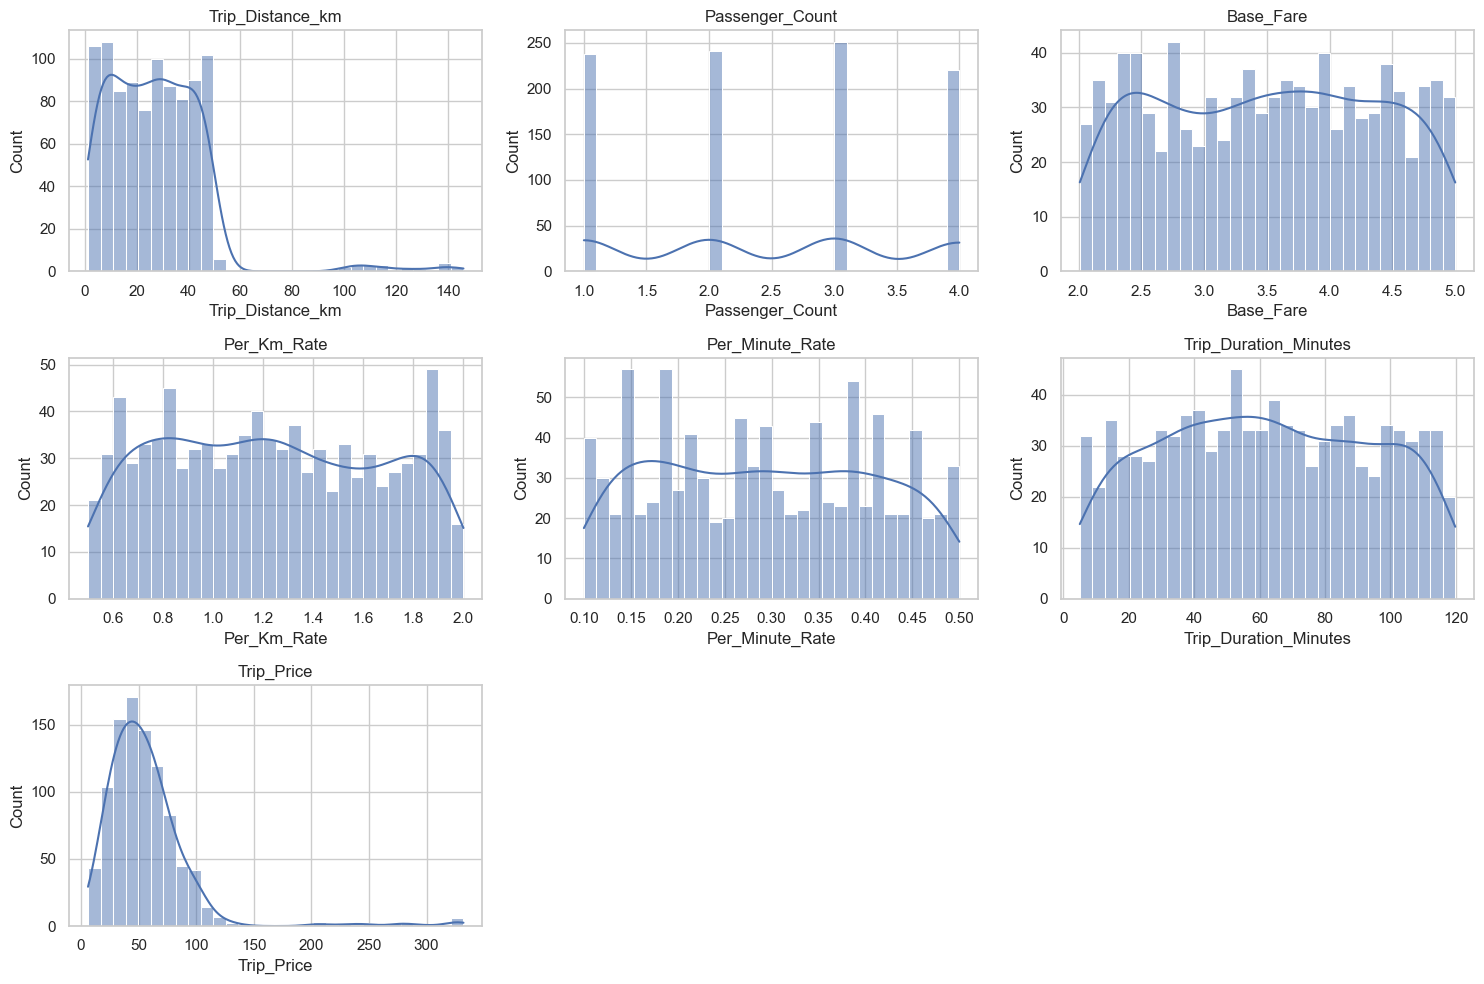

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically detect numeric columns
numeric_columns = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))

# Plot histograms for each numeric column
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  # Adjust rows/cols based on how many numeric columns you have
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


## 2.2. Checking if the Dataset is Balanced/Imbalanced :

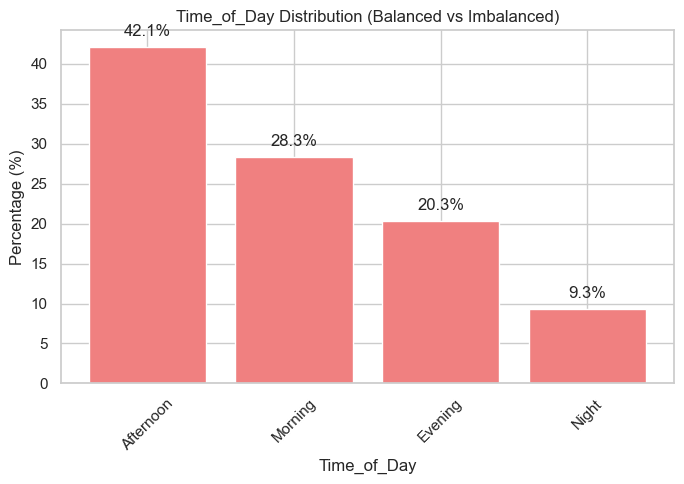

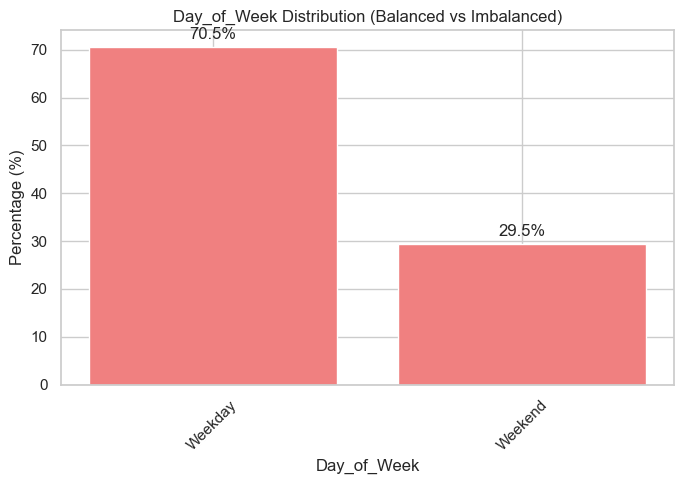

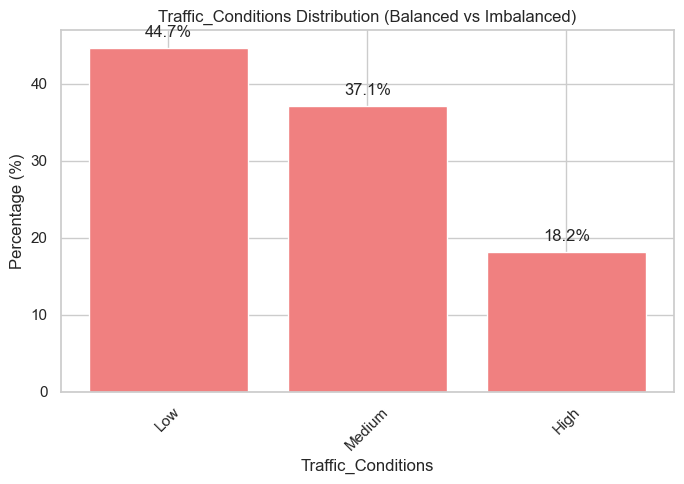

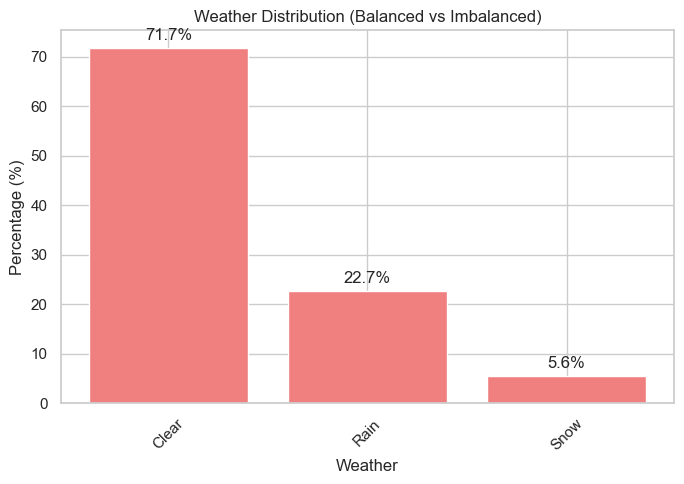

In [22]:
 import matplotlib.pyplot as plt

# Categorical columns to analyze
categorical_cols = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather', 'Price_Category']

# Plot frequency and percentage for each
for col in categorical_cols:
    if col in df.columns:  # Avoid KeyError if column is missing
        counts = df[col].value_counts(dropna=False)
        percentages = counts / counts.sum() * 100

        plt.figure(figsize=(7, 5))
        bars = plt.bar(counts.index.astype(str), percentages.values, color='lightcoral')

        # Add percentage labels
        for bar, pct in zip(bars, percentages):
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{pct:.1f}%', ha='center', va='bottom')

        plt.title(f'{col} Distribution (Balanced vs Imbalanced)')
        plt.xlabel(col)
        plt.ylabel('Percentage (%)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


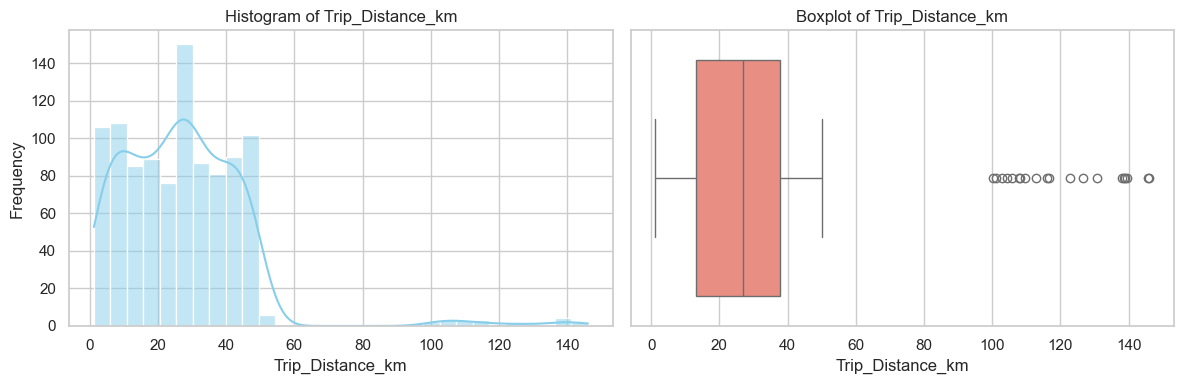

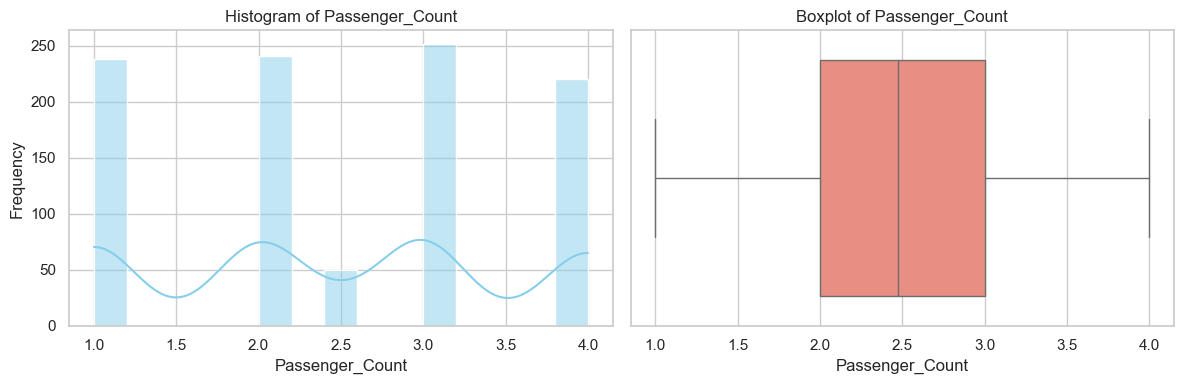

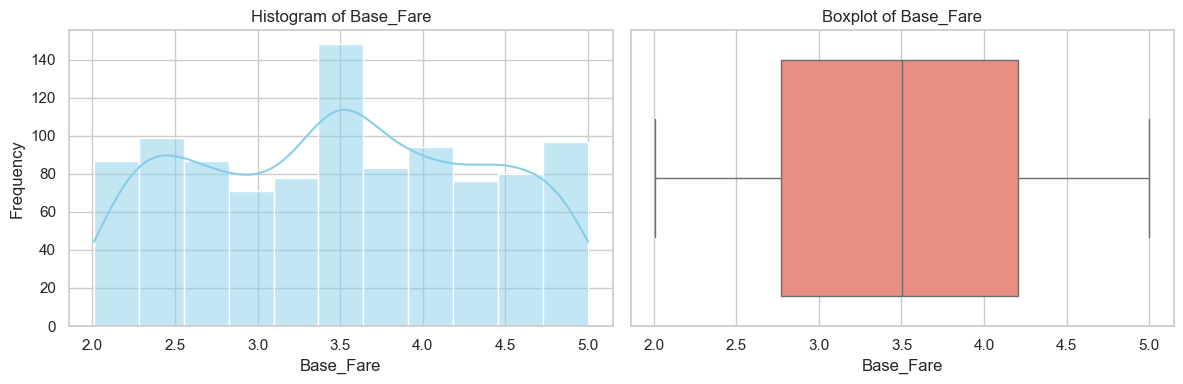

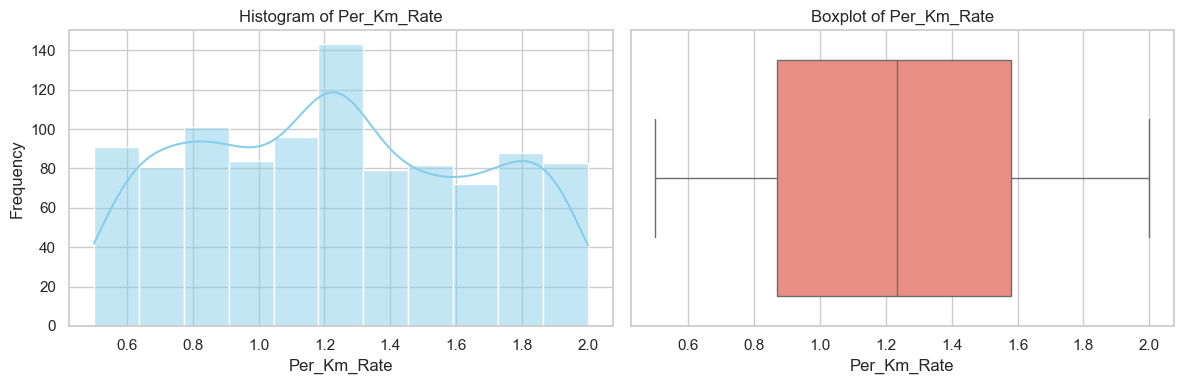

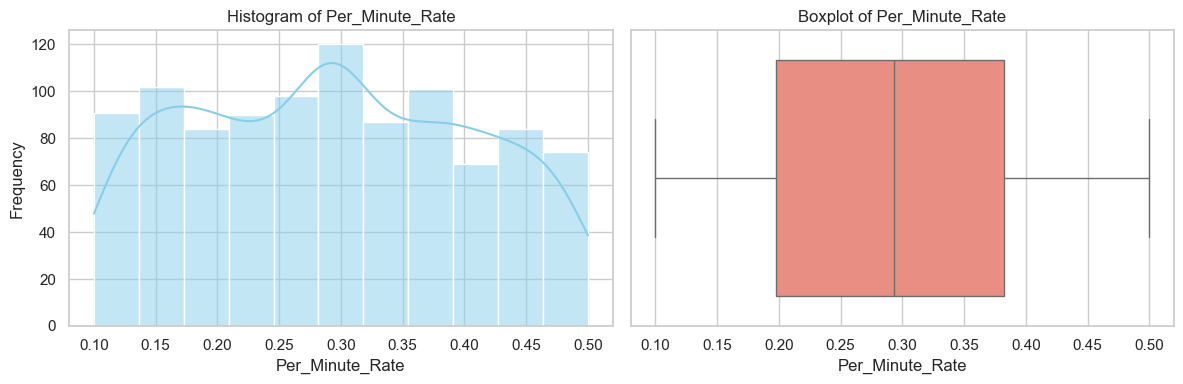

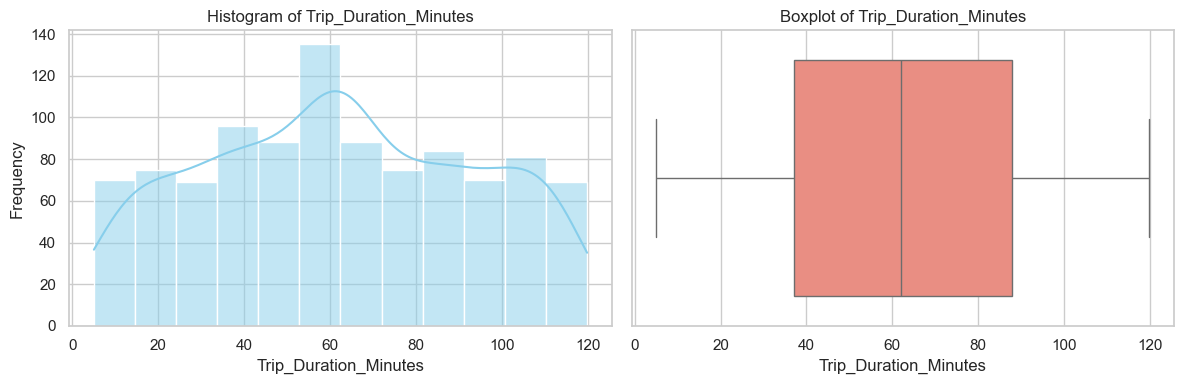

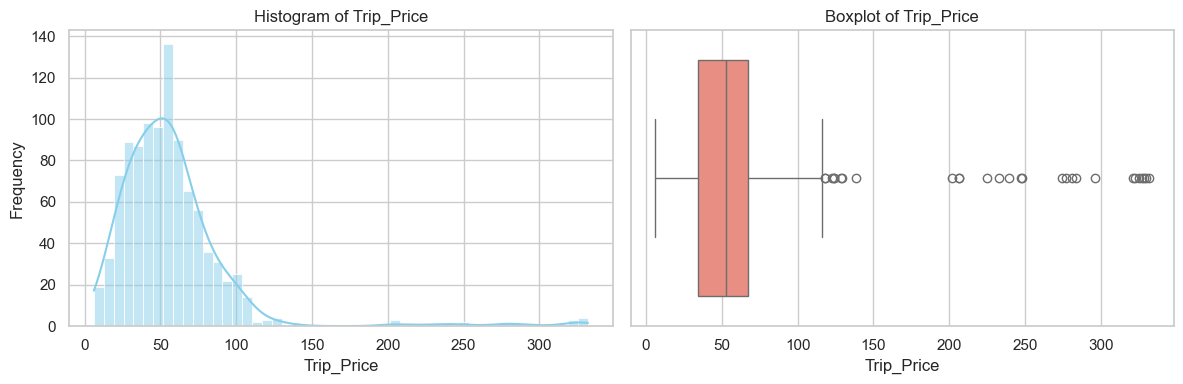

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
numeric_columns = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare',
                   'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']

# Fill missing values with mean (if needed)
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Plot for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


## 2.3. Check for Missing values :

In [8]:
print("Initial Missing Values:")
df.isnull().sum()

Initial Missing Values:


Trip_Distance_km          0
Time_of_Day              50
Day_of_Week              50
Passenger_Count           0
Traffic_Conditions       50
Weather                  50
Base_Fare                 0
Per_Km_Rate               0
Per_Minute_Rate           0
Trip_Duration_Minutes     0
Trip_Price                0
dtype: int64

In [9]:
catigorical_col = df.select_dtypes(include='object').columns  
numerical_col = df.select_dtypes(exclude='object').columns

In [10]:
catigorical_col

Index(['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], dtype='object')

In [11]:
df['Time_of_Day'].fillna(df['Time_of_Day'].mode().iloc[0] , inplace=True )
df['Day_of_Week'].fillna(df['Day_of_Week'].mode().iloc[0] , inplace=True )
df['Traffic_Conditions'].fillna(df['Traffic_Conditions'].mode().iloc[0] , inplace=True )
df['Weather'].fillna(df['Weather'].mode().iloc[0] , inplace=True )

C:\Users\Tanvir\AppData\Local\Temp\ipykernel_3492\3468111580.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_of_Day'].fillna(df['Time_of_Day'].mode().iloc[0] , inplace=True )
C:\Users\Tanvir\AppData\Local\Temp\ipykernel_3492\3468111580.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [12]:
numerical_col

Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [13]:
df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].mean(),inplace=True)
df['Passenger_Count'].fillna(df['Passenger_Count'].mean(),inplace=True)
df['Per_Km_Rate'].fillna(df['Per_Km_Rate'].mean(),inplace=True)
df['Per_Minute_Rate'].fillna(df['Per_Minute_Rate'].mean(),inplace=True)
df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].mean(),inplace=True)
df['Trip_Price'].fillna(df['Trip_Price'].mean(),inplace=True)
df['Base_Fare'].fillna(df['Base_Fare'].mean(),inplace=True)

C:\Users\Tanvir\AppData\Local\Temp\ipykernel_3492\180793851.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].mean(),inplace=True)
C:\Users\Tanvir\AppData\Local\Temp\ipykernel_3492\180793851.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [84]:
df.isna().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [14]:
categorical_cols = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


## 2.4. Correlation Heatmap :

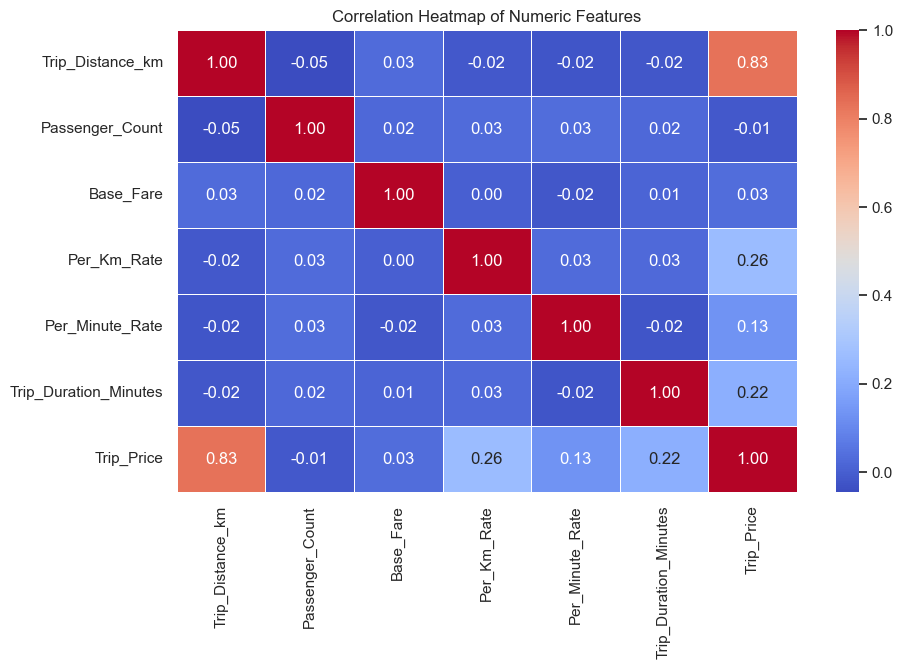


Summary for 'Time_of_Day':
                  mean   median  count
Time_of_Day                           
Afternoon    57.797867  53.0400    421
Evening      56.418404  49.7873    203
Morning      56.008285  53.2792    283
Night        56.328933  53.0315     93

Summary for 'Traffic_Conditions':
                         mean     median  count
Traffic_Conditions                             
High                64.609799  56.874773    182
Low                 55.573733  51.030000    447
Medium              54.647793  51.058800    371

Summary for 'Weather':
              mean   median  count
Weather                           
Clear    55.930606  51.8548    717
Rain     59.628999  53.6582    227
Snow     57.799037  50.6789     56


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Set plot size and draw heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Define function to print statistical summary of Trip_Price grouped by a categorical feature
def categorical_summary(df, feature, target='Trip_Price'):
    if feature in df.columns:
        print(f"\nSummary for '{feature}':")
        summary = df.groupby(feature)[target].agg(['mean', 'median', 'count'])
        print(summary)
    else:
        print(f"Feature '{feature}' not found in DataFrame.")

# Apply summary to desired categorical columns
categorical_summary(df, 'Time_of_Day')
categorical_summary(df, 'Traffic_Conditions')
categorical_summary(df, 'Weather')

